<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/05_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.6 Non parameteric trend and slope

A non-parametric test means that no assumption is made about the distribution of the time series data. The Mann-Kendall Trend Test is used to determine whether or not a trend exists in a time series data. Sen's slope is used to estimate the slope of the trend.



In [110]:
import pip

try:
    import pymannkendall as mk
except ImportError:
  pip.main(['install', 'pymannkendall']) 
  import pymannkendall as mk

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

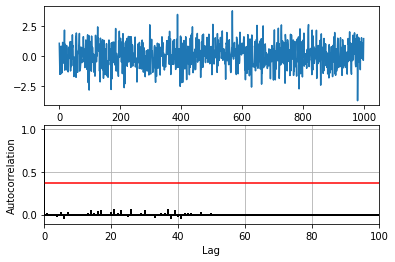

In [111]:
x = np.random.randn(1000)

plt.subplot(2,1,1)
plt.plot(x)

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

Since this is a random data, there is no autocorrelation in the data. Hence, we can use original test.

In [112]:
print(mk.original_test(x, alpha=0.01))

Mann_Kendall_Test(trend='no trend', h=False, p=0.3310716899782551, z=0.9719575045584428, Tau=0.020528528528528527, s=10254.0, var_s=111277500.0, slope=0.00011111529381068608, intercept=0.041253315199775875)


We can see that there is no trend at the $\alpha=0.01$. Try increasing the threshold of $\alpha$ and check the output, remember our data is random so there should not be any trend in it.

Let us now generate a synthetic data with some autocorrelation.

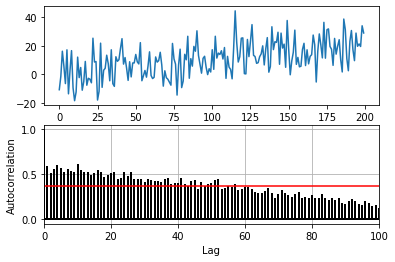

In [113]:
n = 200
x = np.random.randn(n)*10 + np.arange(n)/10

plt.subplot(2,1,1)
plt.plot(x)

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=100, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

Since this data has autocorrelation, we will be using modified Mann Kendall test.

In [114]:
print(mk.hamed_rao_modification_test(x))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=1.2104761637488082e-11, z=6.778955763259917, Tau=0.3628140703517588, s=7220.0, var_s=1134040.2886332953, slope=0.11264975934780176, intercept=-0.49563030762965177)


It is showing an increasing trend. We can try other methods also.

In [115]:
print(mk.yue_wang_modification_test(x))
print(mk.trend_free_pre_whitening_modification_test(x))
print(mk.pre_whitening_modification_test(x))

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=0.0, z=27.089043551860797, Tau=0.3628140703517588, s=7220.0, var_s=71017.72252942222, slope=0.11264975934780176, intercept=-0.49563030762965177)
Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=6.084022174945858e-14, z=7.5060890619108696, Tau=0.35790061418202124, s=7051.0, var_s=882167.0, slope=0.11264975934780176, intercept=-0.49563030762965177)
Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=8.239838900081509e-08, z=5.361796385217466, Tau=0.25567230089843157, s=5037.0, var_s=882167.0, slope=0.11264975934780176, intercept=-0.49563030762965177)


Now let us estimate the non parametric slope.

In [116]:
import scipy as sp
n = 100
x = np.arange(n)
y = x*5 + 2*np.random.randn(n)

ab_np = sp.stats.mstats.theilslopes(y, x, 0.90)
ab_linear = sp.stats.mstats.linregress(x, y)

print(ab_np)
print(ab_linear)

(4.9972388486741135, -1.2575257268521227, 4.984852761432158, 5.011211175359862)
LinregressResult(slope=4.99874220308662, intercept=-0.13960524643053418, rvalue=0.9998915337513098, pvalue=2.421125842322003e-181, stderr=0.007437814483604682, intercept_stderr=0.42620039919559916)


Estimated parameters ($a$ and $b$) looks similar to the true parameters. Let us look at the data when some outliers are present.

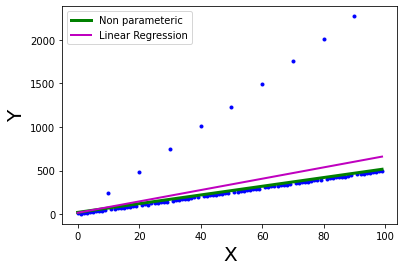

In [117]:
y[0:100:10] *= 5 # introduce some outliers

ab_np = sp.stats.mstats.theilslopes(y, x, 0.90)
ab_linear = sp.stats.mstats.linregress(x, y)

plt.plot(x, y, '.b')
plt.plot(x, ab_np[1] + ab_np[0] * x, c="g", lw=3, label="Non parameteric")
plt.plot(x, ab_linear[1] + ab_linear[0] * x, c="m", lw=2, label="Linear Regression")
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.legend(loc=2)
plt.show()

We can see that non parameteric regression is not much influenced by the outliers. 